# 📘 **Estudo Dirigido: Capítulo 4 - Características de Sistema de Controle com Retroação**

## **1. Resumo Estruturado do Capítulo**

### **Tema Central:** Vantagens e características dos sistemas de controle com realimentação

### **Conceitos Fundamentais:**

#### 🔄 **1. Malha Aberta vs Malha Fechada**
- **Malha Aberta:** Sem feedback, saída = G(s)R(s)
- **Malha Fechada:** Com feedback, saída = G(s)/[1+G(s)H(s)] * R(s)
- **Equação do erro:** E(s) = 1/[1+G(s)H(s)] * R(s)

#### 📉 **2. Sensibilidade do Sistema**
- **Definição:** S = (ΔT/T) / (ΔG/G)
- **Malha aberta:** S = 1 (alta sensibilidade)
- **Malha fechada:** S = 1/[1+G(s)H(s)] (sensibilidade reduzida)
- **Conclusão:** Retroação diminui sensibilidade a variações paramétricas

#### ⚡ **3. Resposta Transitória**
- Controlável via ajuste de ganhos
- Exemplo: Controle de velocidade com tacômetro
- Pode ser melhorada sem alterar componentes físicos

#### 🛡️ **4. Rejeição a Perturbações**
- Sinais indesejados (D(s)) são atenuados
- Exemplo: Sistema de laminação de aço
- Efeito reduzido por fator 1/[1+G(s)H(s)]

#### 🎯 **5. Erro de Estado Estacionário**
- Erro após transitório desaparecer
- **Malha aberta:** e(∞) = 1 - G(0)
- **Malha fechada:** e(∞) = 1/[1+G(0)]
- Retroação permite erro próximo de zero

#### 💰 **6. Custo da Retroação**
1. **Complexidade aumentada**
2. **Sensores caros** (componente mais custoso)
3. **Perda de ganho** (redução por fator 1/[1+G(s)])
4. **Risco de instabilidade**
5. **Ruído de medição**

### **Exemplos de Projeto:**

#### 🏗️ **Canal da Mancha (Máquinas Perfuratrizes)**
- **Sistema:** Y(s) = (K+11s)/(s²+12s+K)R(s) + 1/(s²+12s+K)D(s)
- **Objetivo:** Alinhamento preciso entre túneis
- **Compromisso:** Ganho alto → melhor rejeição de perturbações vs Ganho baixo → menor overshoot

#### 🚀 **Veículo Explorador de Marte (Sojourner)**
- **Controle de posição** com entrada em rampa
- **Comparação** malha aberta vs fechada
- **Sensibilidade** reduzida com retroação

#### 💾 **Sistema de Leitura de Disco**
- **Precisão** no posicionamento da cabeça
- **Rejeição** a vibrações e choques
- **Compromisso** entre resposta rápida e estabilidade

### **Análise com MATLAB:**
- Simulação de respostas transitórias
- Cálculo de sensibilidade
- Análise de rejeição a perturbações
- Ajuste de ganhos para otimização

---

## **2. Principais Equações**

| Conceito | Equação | Observação |
|----------|---------|------------|
| **Malha Fechada** | \( Y(s) = \frac{G(s)}{1 + G(s)H(s)} R(s) \) | Retroação unitária: H(s)=1 |
| **Sensibilidade** | \( S_G^T = \frac{1}{1 + G(s)H(s)} \) | Quanto menor, melhor |
| **Erro** | \( E(s) = \frac{1}{1 + G(s)H(s)} R(s) \) | Minimizar magnitude |
| **Rejeição Perturbação** | \( \frac{Y(s)}{T_d(s)} \approx \frac{1}{G_1(s)H(s)} \) | Ganho alto → melhor rejeição |

---

## **3. Vantagens da Retroação**

1. ✅ **Redução de sensibilidade** a variações paramétricas
2. ✅ **Controle preciso** da resposta transitória
3. ✅ **Atenuação eficaz** de perturbações
4. ✅ **Minimização** do erro estacionário
5. ✅ **Compensação** de não-linearidades

---

## **4. Aplicações na Indústria 4.0**

| Sistema de Controle | Aplicação Indústria 4.0 | Benefício |
|-------------------|-------------------------|-----------|
| **Malha Fechada** | Robôs colaborativos | Ajuste em tempo real |
| **Sensibilidade** | Processos químicos | Tolerância a variações |
| **Rejeição** | Linhas de produção | Continuidade operacional |
| **Erro Zero** | CNC de precisão | Qualidade consistente |

---

**Próximo:** Execute as células de código para simulações práticas e análises interativas dos conceitos apresentados.

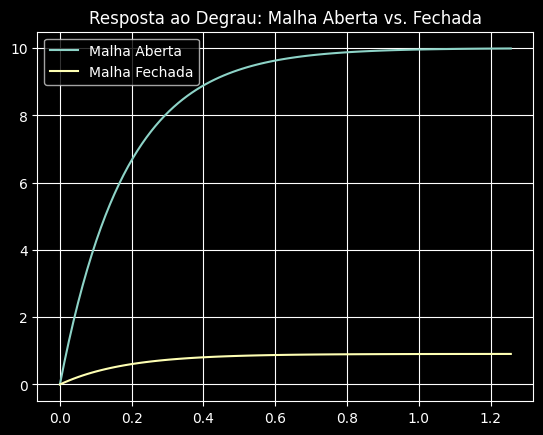

In [10]:
import control
import matplotlib.pyplot as plt
import numpy as np

# Sistema de 1ª ordem: G(s) = K / (τs + 1)
K = 10
tau = 2
G = control.TransferFunction([K], [tau, 1])

# Malha aberta
t, y_open = control.step_response(G)

# Malha fechada com retroação unitária
G_closed = control.feedback(G, 1)
t, y_closed = control.step_response(G_closed)

plt.plot(t, y_open, label='Malha Aberta')
plt.plot(t, y_closed, label='Malha Fechada')
plt.legend()
plt.title('Resposta ao Degrau: Malha Aberta vs. Fechada')
plt.grid()
plt.show()

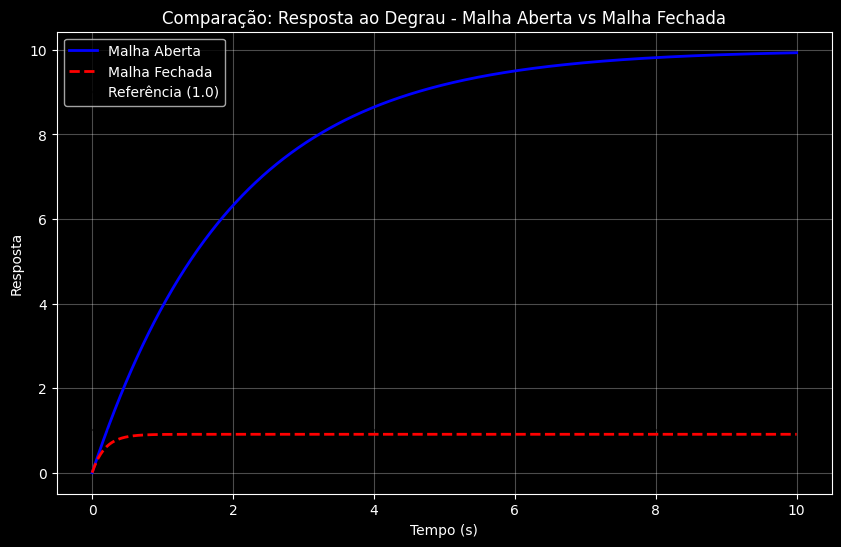

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
import control  # Agora instalado

# Parâmetros do sistema
K = 10
tau = 2

# Função de transferência: G(s) = K/(τs + 1)
num = [K]
den = [tau, 1]
G = signal.TransferFunction(num, den)

# Tempo de simulação
t = np.linspace(0, 10, 1000)

# Resposta ao degrau - Malha Aberta
t_open, y_open = signal.step(G, T=t)

# Resposta ao degrau - Malha Fechada (com retroação unitária)
# Função de transferência em malha fechada: G_closed = G/(1 + G)
G_closed = signal.TransferFunction(num, [tau, 1 + K])
t_closed, y_closed = signal.step(G_closed, T=t)

# Plotagem comparativa
plt.figure(figsize=(10, 6))
plt.plot(t_open, y_open, 'b-', linewidth=2, label='Malha Aberta')
plt.plot(t_closed, y_closed, 'r--', linewidth=2, label='Malha Fechada')
plt.plot([0, 10], [1, 1], 'k:', alpha=0.5, label='Referência (1.0)')
plt.xlabel('Tempo (s)')
plt.ylabel('Resposta')
plt.title('Comparação: Resposta ao Degrau - Malha Aberta vs Malha Fechada')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

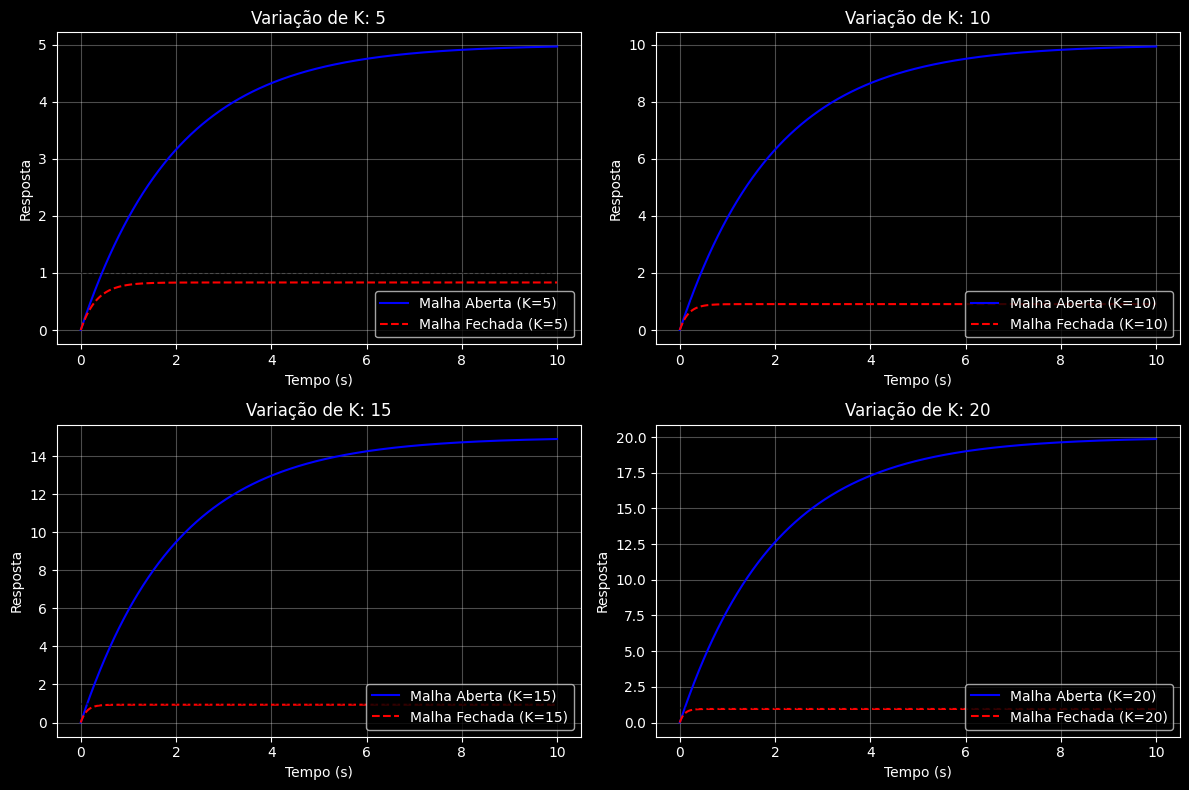

ANÁLISE DE SENSIBILIDADE
Para K nominal = 10:
Malha Aberta: S = 1 (sempre)
Malha Fechada: S ≈ 0.0909


In [12]:
# Análise de sensibilidade a variações no ganho K
K_nominal = 10
K_variations = [5, 10, 15, 20]  # ±50% variação

plt.figure(figsize=(12, 8))

for i, K in enumerate(K_variations):
    # Sistema em malha aberta
    G_open = signal.TransferFunction([K], [tau, 1])
    t_open, y_open = signal.step(G_open, T=t)

    # Sistema em malha fechada
    G_closed = signal.TransferFunction([K], [tau, 1 + K])
    t_closed, y_closed = signal.step(G_closed, T=t)

    plt.subplot(2, 2, i+1)
    plt.plot(t_open, y_open, 'b-', label=f'Malha Aberta (K={K})')
    plt.plot(t_closed, y_closed, 'r--', label=f'Malha Fechada (K={K})')
    plt.plot([0, 10], [1, 1], 'k:', alpha=0.5)
    plt.title(f'Variação de K: {K}')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Resposta')
    plt.legend(loc='lower right')
    plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Cálculo de sensibilidade
print("ANÁLISE DE SENSIBILIDADE")
print("="*50)
print("Para K nominal = 10:")
print(f"Malha Aberta: S = 1 (sempre)")
print(f"Malha Fechada: S ≈ {1/(1+K_nominal):.4f}")

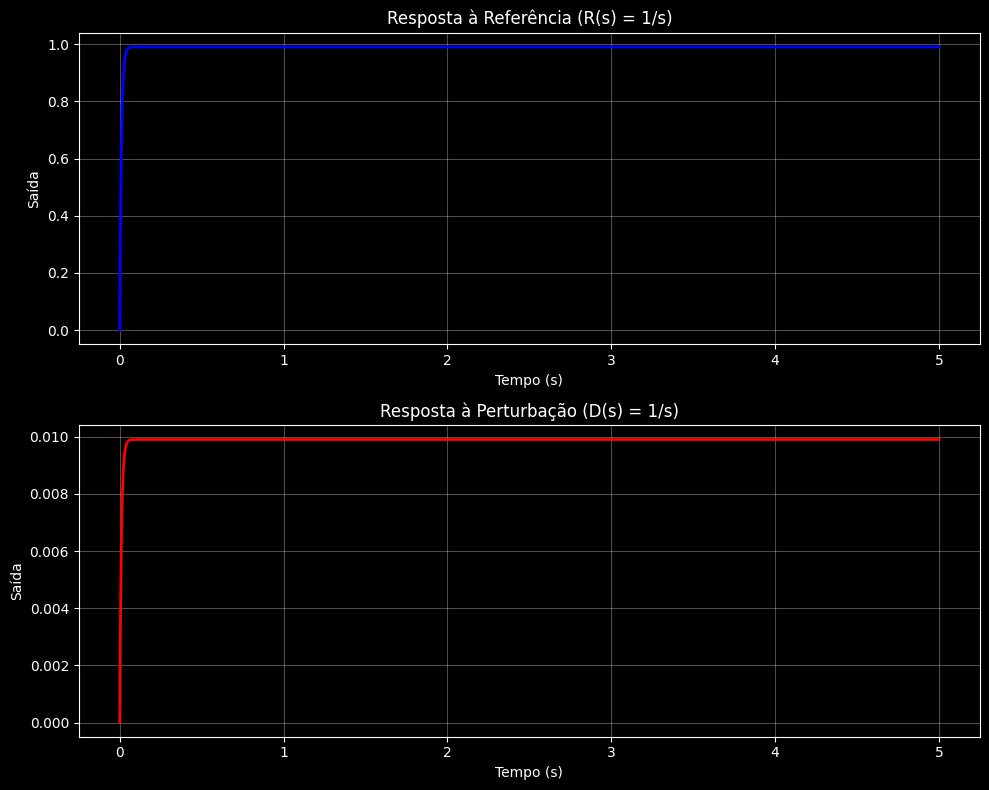

EFEITO DA PERTURBAÇÃO
Valor final da perturbação: 0.009901
Redução da perturbação: 99.01%


In [13]:
# Sistema com perturbação
# Modelo: Y(s) = G/(1+GH)*R(s) + Gd/(1+GH)*D(s)

# Sistema nominal
K = 100
tau = 1
G = signal.TransferFunction([K], [tau, 1])
H = 1  # Retroação unitária

# Resposta à referência R(s) = 1/s
G_closed_ref = signal.TransferFunction([K], [tau, 1 + K])
t, y_ref = signal.step(G_closed_ref, T=np.linspace(0, 5, 1000))

# Resposta à perturbação D(s) = 1/s
Gd = signal.TransferFunction([1], [tau, 1])  # Perturbação afeta o processo
G_closed_dist = signal.TransferFunction([1], [tau, 1 + K])
t, y_dist = signal.step(G_closed_dist, T=np.linspace(0, 5, 1000))

plt.figure(figsize=(10, 8))

plt.subplot(2, 1, 1)
plt.plot(t, y_ref, 'b-', linewidth=2)
plt.title('Resposta à Referência (R(s) = 1/s)')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída')
plt.grid(True, alpha=0.3)

plt.subplot(2, 1, 2)
plt.plot(t, y_dist, 'r-', linewidth=2)
plt.title('Resposta à Perturbação (D(s) = 1/s)')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("EFEITO DA PERTURBAÇÃO")
print("="*50)
print(f"Valor final da perturbação: {1/(1+K):.6f}")
print(f"Redução da perturbação: {1 - 1/(1+K):.2%}")

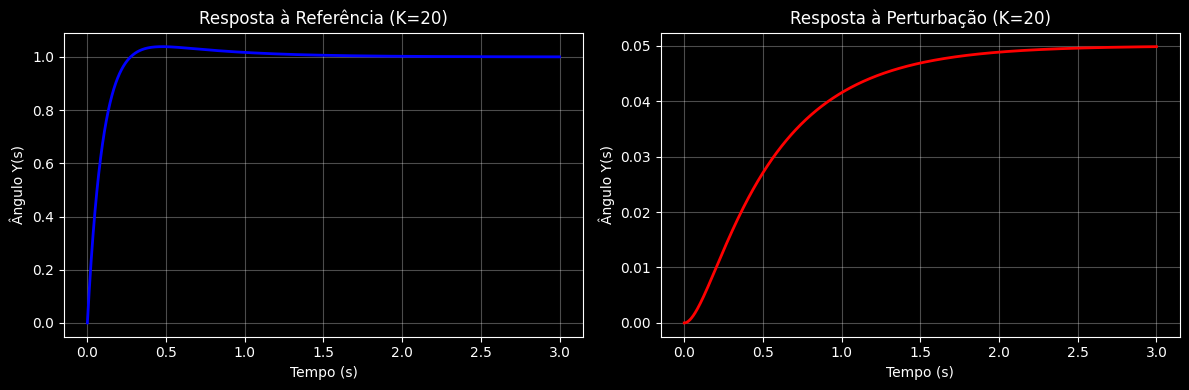

GANHO K = 20
------------------------------
Tempo de assentamento: 0.90 s
Sobresinal: 3.8%
Efeito da perturbação: 0.0498 rad



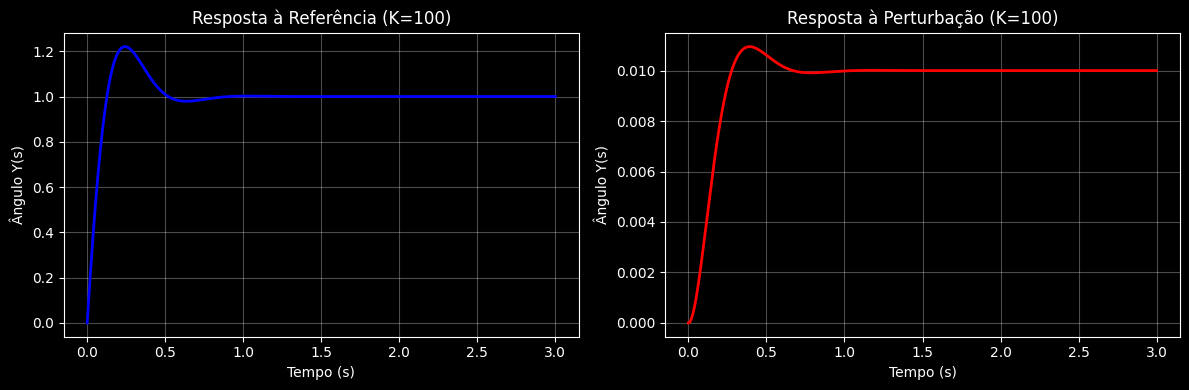

GANHO K = 100
------------------------------
Tempo de assentamento: 0.66 s
Sobresinal: 22.0%
Efeito da perturbação: 0.0100 rad



In [15]:
# Sistema das máquinas perfuratrizes do Canal da Mancha
# Y(s) = (K + 11s)/(s² + 12s + K) * R(s) + 1/(s² + 12s + K) * D(s)

def simular_perfuradora(K=20):
    # Resposta à referência
    num_ref = [11, K]
    den = [1, 12, K]

    # Resposta à perturbação
    num_dist = [1]

    # Simulação
    t = np.linspace(0, 3, 1000)

    # Resposta ao degrau na referência
    sys_ref = signal.TransferFunction(num_ref, den)
    t_ref, y_ref = signal.step(sys_ref, T=t)

    # Resposta ao degrau na perturbação
    sys_dist = signal.TransferFunction(num_dist, den)
    t_dist, y_dist = signal.step(sys_dist, T=t)

    # Plot
    plt.figure(figsize=(12, 4))

    plt.subplot(1, 2, 1)
    plt.plot(t_ref, y_ref, 'b-', linewidth=2)
    plt.title(f'Resposta à Referência (K={K})')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Ângulo Y(s)')
    plt.grid(True, alpha=0.3)

    plt.subplot(1, 2, 2)
    plt.plot(t_dist, y_dist, 'r-', linewidth=2)
    plt.title(f'Resposta à Perturbação (K={K})')
    plt.xlabel('Tempo (s)')
    plt.ylabel('Ângulo Y(s)')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Métricas
    print(f"GANHO K = {K}")
    print("-" * 30)

    # Tempo de assentamento (2%)
    final_value_ref = y_ref[-1]
    settling_index_ref = np.where(np.abs(y_ref - final_value_ref) > 0.02*final_value_ref)[0]
    settling_time_ref = t_ref[settling_index_ref[-1]] if len(settling_index_ref) > 0 else 0

    # Sobresinal
    overshoot_ref = 100 * (np.max(y_ref) - final_value_ref) / final_value_ref if final_value_ref > 0 else 0

    # Efeito da perturbação
    effect_dist = y_dist[-1]

    print(f"Tempo de assentamento: {settling_time_ref:.2f} s")
    print(f"Sobresinal: {overshoot_ref:.1f}%")
    print(f"Efeito da perturbação: {effect_dist:.4f} rad")

# Teste com diferentes valores de K
for K in [20, 100]:
    simular_perfuradora(K)
    print()

EXERCÍCIO 1: Sistema de 2ª ordem com diferentes ζ


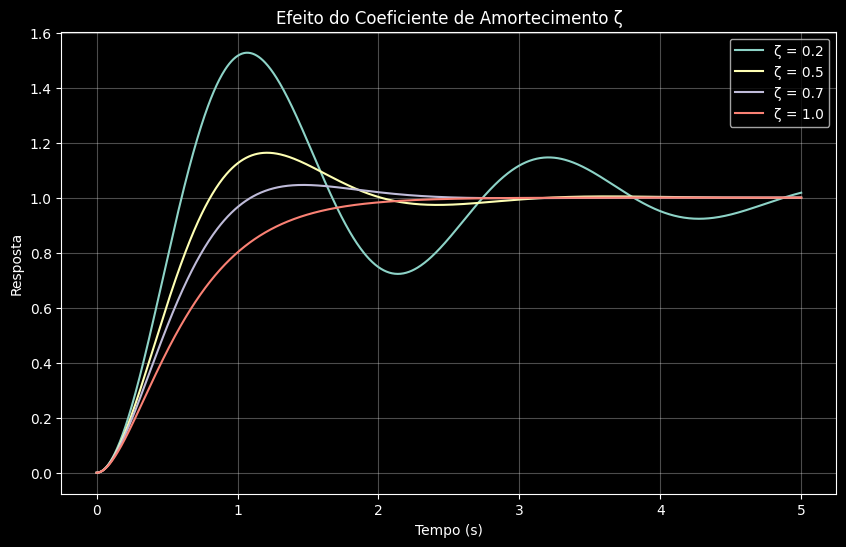

In [16]:
# EXERCÍCIO 1: Sistema de 2ª ordem
print("EXERCÍCIO 1: Sistema de 2ª ordem com diferentes ζ")
print("="*60)

zetas = [0.2, 0.5, 0.7, 1.0]
omega_n = 3

plt.figure(figsize=(10, 6))
for zeta in zetas:
    num = [omega_n**2]
    den = [1, 2*zeta*omega_n, omega_n**2]
    sys = signal.TransferFunction(num, den)
    t, y = signal.step(sys, T=np.linspace(0, 5, 1000))
    plt.plot(t, y, label=f'ζ = {zeta}')

plt.xlabel('Tempo (s)')
plt.ylabel('Resposta')
plt.title('Efeito do Coeficiente de Amortecimento ζ')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()